In [15]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Check uploaded files
for file_name in uploaded.keys():
    print(f'User uploaded file "{file_name}"')

    # Step 3: Load dataset (if CSV)
    df = pd.read_csv(file_name)
    print("✅ Dataset loaded successfully!")
    df.head()


Saving StudentsPerformance.csv to StudentsPerformance (1).csv
User uploaded file "StudentsPerformance (1).csv"
✅ Dataset loaded successfully!


In [19]:
import pandas as pd

# Step 1: Load the uploaded dataset
df = pd.read_csv('StudentsPerformance.csv')

# Step 2: Display basic info before cleaning
print("Before cleaning:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Step 3: Drop rows with missing values
df_cleaned = df.dropna()

# Step 4: Display info after cleaning
print("\nAfter cleaning:")
print(df_cleaned.info())

# Step 5: (Optional) Save cleaned data
df_cleaned.to_csv('StudentsPerformance_cleaned.csv', index=False)
print("\n✅ Cleaned dataset saved as 'StudentsPerformance_cleaned.csv'")

# Step 6: Preview cleaned dataset
df_cleaned.head()


Before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing values per column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score            

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset preview:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Model Evaluation:
Mean Absolute Error: 7.280881770618455
Mean Squared Error: 77.75953982761706
R² Score: 0.6804469009921283


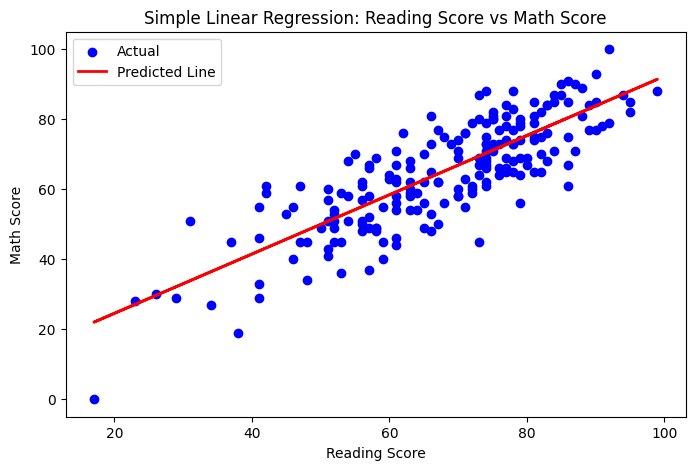

In [20]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load dataset
df = pd.read_csv('StudentsPerformance.csv')

# Step 3: Display first few rows
print("Dataset preview:")
print(df.head())

# Step 4: Check for missing values and drop them
df = df.dropna()

# Step 5: Convert categorical columns to numeric if needed
# Example: encode 'gender' or 'race/ethnicity' if necessary
df = pd.get_dummies(df, drop_first=True)

# Step 6: Choose feature (X) and target (y)
# Example: Predict 'math score' based on 'reading score'
X = df[['reading score']]
y = df['math score']

# Step 7: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate model
print("\nModel Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 11: Display regression line
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Simple Linear Regression: Reading Score vs Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.legend()
plt.show()
